In [26]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from PIL import Image

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

from pathlib import Path
from math import ceil
from functools import partial
from io import BytesIO

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from skimage import color
from sklearn.cluster import KMeans, AgglomerativeClustering

from typing import Union, Callable



In [2]:
china = load_sample_image("china.jpg")
china.shape

(427, 640, 3)

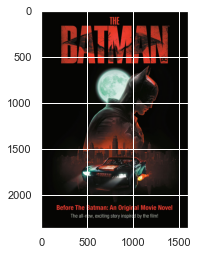

In [48]:
oi = Image.open('batman.jpeg')

oi = np.asarray(oi)
plt.imshow(oi)

In [24]:
def filter_pixels(pixels: np.ndarray, low = 0.0, high = 1.0) -> np.ndarray:
    pix_mean = pixels.mean(1)
    mask = (low <= pix_mean) & (pix_mean <= high)
    idx = np.arange(len(pixels))
    return pixels[idx[mask]]

filter_pixels(oi.reshape((-1,3)).astype("float32") / 255)*255

array([[  3.,  25.,  46.],
       [  3.,  25.,  46.],
       [  3.,  25.,  46.],
       ...,
       [113., 147., 182.],
       [115., 149., 184.],
       [116., 150., 185.]], dtype=float32)

In [182]:

def filter_pixels(pixels: np.ndarray, low = 0.0, high = 1.0) -> np.ndarray:
    pix_mean = pixels.mean(1)
    mask = (low <= pix_mean) & (pix_mean <= high)
    idx = np.arange(len(pixels))
    return pixels[idx[mask]]

def open_img(path):
    '''MUST BE A JPG/JPEG'''
    path = str(path)
    try:
        img = Image.open(path) # Open the image
        img = np.asarray(img)
        imgg = img.reshape((-1,3)).astype("float32") / 255 # Transform it into an array and normalize 0-255 -> 0-1
        return filter_pixels(imgg,low=0,high=0.99)
        
        
    except Exception as e:
        print(e)
    return img


def pallete(path, n_clusters=5):
    img = open_img(path)
    
    kmeans = KMeans(n_clusters)
    predictions = kmeans.fit_predict(img)
    centers = kmeans.cluster_centers_
    
    rgb = centers*  255
    rgb = rgb.astype(np.int64)
    
    dic = {}
    for i,x in enumerate(rgb):
        dic[str(i)] = x
    
    return dic
    

def rgb2hsv(dat: np.ndarray) -> np.ndarray:
    return color.rgb2hsv(dat)

def hsv2rgb(dat: np.ndarray) -> np.ndarray:
    return color.hsv2rgb(dat)
#def rgb2hsv(rgb):
#    return color.rgb2hsv(rgb)[0]
        

In [168]:
kk = open_img('batman.jpeg')
#kk = rgb2hsv(kk)
kk.shape

(3764227, 3)

In [169]:
kmeans = KMeans(n_clusters=5)
predictions = kmeans.fit_predict(kk)
centers = kmeans.cluster_centers_

In [183]:
#centers = hsv2rgb(centers)
#centers = hsv2rgb(centers)
#centers*255

centers = pallete('batman.jpeg')

In [184]:
centers

{'0': array([7, 7, 5]),
 '1': array([104,  61,  51]),
 '2': array([182, 212, 199]),
 '3': array([46, 35, 32]),
 '4': array([205,  59,  42])}

In [181]:
dic = {}

for i,x in enumerate(centers):
    dic[str(i)] = x
    
dic

{'0': array([46, 35, 32]),
 '1': array([104,  61,  51]),
 '2': array([7, 7, 5]),
 '3': array([182, 212, 199]),
 '4': array([205,  59,  42])}

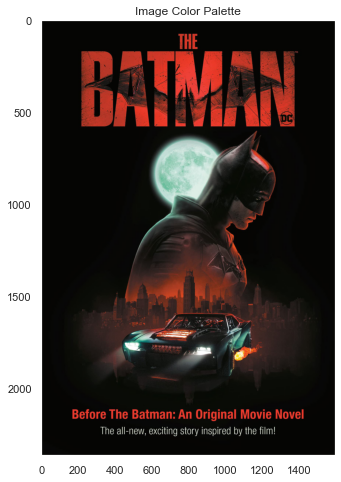

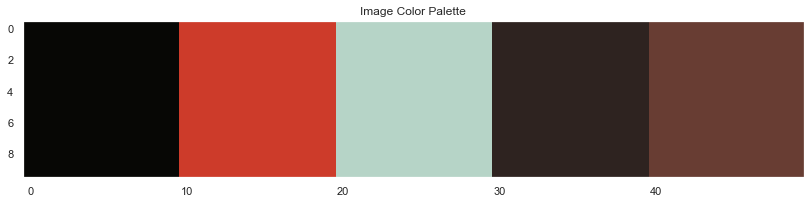

In [173]:
plt.figure(figsize=(14,8))
plt.imshow(oi)
plt.title("Image Color Palette")
plt.grid()

plt.figure(figsize=(14,8))
plt.imshow(centers[np.concatenate([[i] * 100 for i in range(len(centers))]).reshape((-1,10)).T])
plt.title("Image Color Palette")
plt.grid()